In [292]:
library('ggplot2')
library('dplyr')
library("plot3D")

Warning message:
"pakiet 'plot3D' został zbudowany w wersji R 4.2.2"


In [104]:
data <- read.csv('pm10.csv')

In [105]:
data_nums <- data[6:8765,]

In [106]:
length(data$X1)

[1] 8765

# Tu próbowałam zrobić taki najbardziej basic model 
czyli bez żadnej fizyki i po prostu że jest zamknięty, szczelny i biorę średnią z tego pola w którym jestem jednego wyżej, niżej, na prawo, na lewo. Ale ten model jest słaby bo w sumie nic nie uwzględnia ale zawsze można pokazać, że no jednak trzeba trochę więcej dodać do niego.

In [51]:
x <- c()
y <- c()
z <- c()
for(i in 1:100){
    x <- c(x,rep(i,100))
    for(j in 1:100){
        y <- c(y,j)
        z <- c(z,sample(0:5,1, prob=c(.5,.3,.1,.05,.04,.01)))
    }
}
environment = data.frame(x,y,z)
colnames(environment) <- c('X','Y','Z')

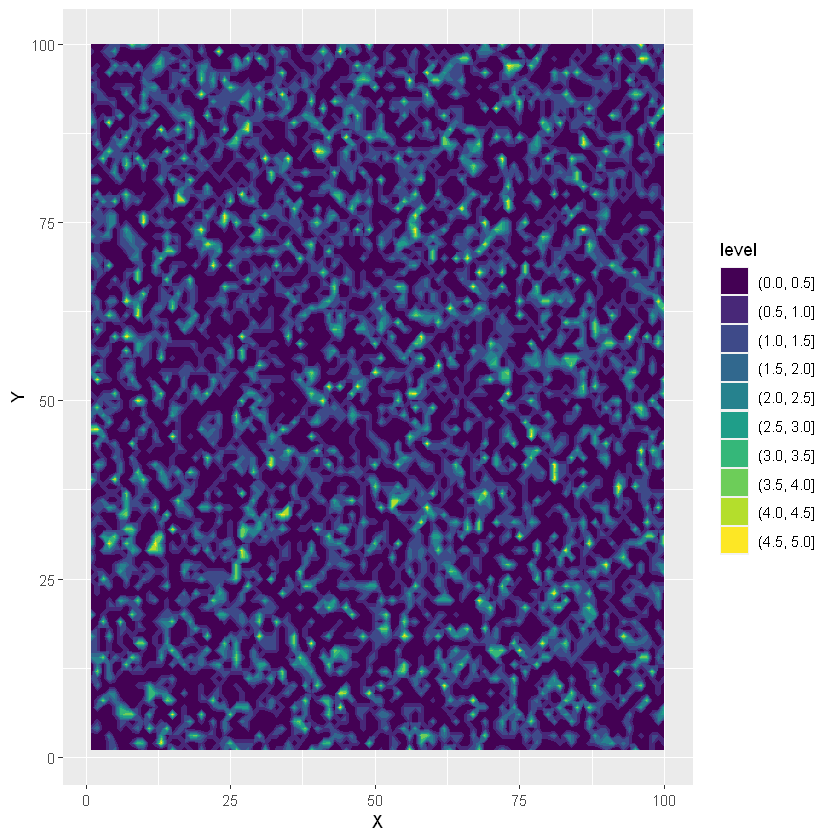

In [52]:
ggplot(environment,aes(X,Y,z=Z))+geom_contour_filled()

In [64]:
environment %>% group_by(X,Y);
en <- as.matrix(environment$Z)
dim(en) <- c(100,100)

X,Y,Z
<int>,<int>,<int>
1,1,0
1,2,0
1,3,0
1,4,1
1,5,0
1,6,0
1,7,0
1,8,0
1,9,0


In [65]:
en <- t(en)

In [67]:
dim(en)[1]

[1] 100

In [70]:
new_matrix <- matrix(data=0, nrow=100, ncol=100)
new_matrix[1,1] = mean(c(en[1,1],en[2,1],en[1,2]))
new_matrix[1,100] = mean(c(en[1,100],en[2,100],en[1,99]))
new_matrix[100,1] = mean(c(en[100,1],en[99,1],en[100,2]))
new_matrix[100,100] = mean(c(en[100,100],en[99,100],en[100,99]))
for(i in 2:99) new_matrix[i,1] = mean(c(en[i,1],en[i-1,1],en[i+1,1],en[i,2]))
for(i in 2:99) new_matrix[i,100] = mean(c(en[i,100],en[i-1,100],en[i+1,100],en[i,99]))
for(j in 2:99) new_matrix[1,j] = mean(c(en[1,j-1],en[1,j],en[1,j+1],en[2,j]))
for(j in 2:99) new_matrix[100,j] = mean(c(en[100,j-1],en[100,j],en[100,j+1],en[99,j]))
for(i in 2:99){
    for(j in 2:99) new_matrix[i,j] = mean(c(en[i,j],en[i-1,j],en[i+1,j],en[i,j-1],en[i,j+1]))
}

In [73]:
Z1 <- c()
for(i in 1:100) Z1 <- c(Z1,new_matrix[i,])
new_environment <- data.frame(x,y,Z1)
colnames(new_environment) <- c('X','Y','Z')

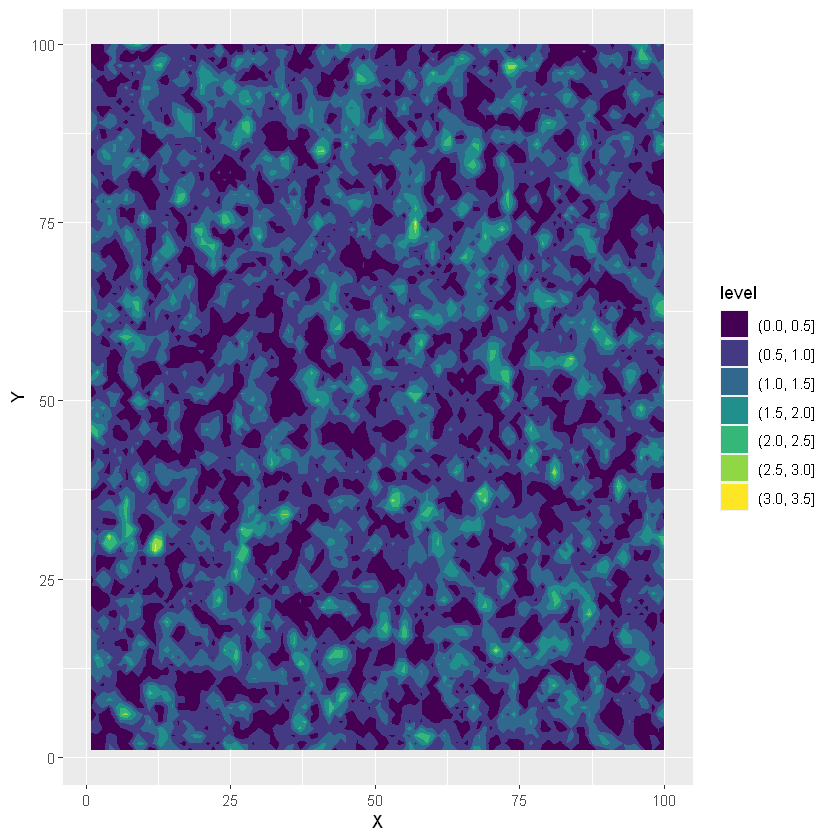

In [74]:
ggplot(new_environment,aes(X,Y,z=Z))+geom_contour_filled()

In [94]:
pollution_average <- function(en){
    n <- length(en[1,])
    new_matrix <- matrix(data=0, nrow=n, ncol=n)
    new_matrix[1,1] = mean(c(en[1,1],en[2,1],en[1,2]))
    new_matrix[1,n] = mean(c(en[1,n],en[2,n],en[1,(n-1)]))
    new_matrix[n,1] = mean(c(en[n,1],en[(n-1),1],en[n,2]))
    new_matrix[n,n] = mean(c(en[n,n],en[(n-1),n],en[n,(n-1)]))
    for(i in 2:(n-1)) new_matrix[i,1] = mean(c(en[i,1],en[i-1,1],en[i+1,1],en[i,2]))
    for(i in 2:(n-1)) new_matrix[i,n] = mean(c(en[i,n],en[i-1,n],en[i+1,n],en[i,(n-1)]))
    for(j in 2:(n-1)) new_matrix[1,j] = mean(c(en[1,j-1],en[1,j],en[1,j+1],en[2,j]))
    for(j in 2:(n-1)) new_matrix[n,j] = mean(c(en[n,j-1],en[n,j],en[n,j+1],en[(n-1),j]))
    for(i in 2:(n-1)){
        for(j in 2:(n-1)) new_matrix[i,j] = mean(c(en[i,j],en[i-1,j],en[i+1,j],en[i,j-1],en[i,j+1]))
    }
    return(new_matrix)
}

In [95]:
x <- c()
y <- c()
z <- c()
for(i in 1:100){
    x <- c(x,rep(i,100))
    for(j in 1:100){
        y <- c(y,j)
        z <- c(z,sample(0:5,1, prob=c(.5,.3,.1,.05,.04,.01)))
    }
}
environment = data.frame(x,y,z)
colnames(environment) <- c('X','Y','Z')
environment %>% group_by(X,Y)
n <- length(unique(environment$X))
base <- as.matrix(environment$Z)
dim(base) <- c(n,n)
base <- t(base)

X,Y,Z
<int>,<int>,<int>
1,1,0
1,2,1
1,3,0
1,4,0
1,5,0
1,6,1
1,7,0
1,8,4
1,9,2


In [96]:
base[1,2]

[1] 1

In [97]:
one1 <- pollution_average(base)
for(i in 1:99) one1 <- pollution_average(one1)
Z1 <- c()
for(i in 1:100) Z1 <- c(Z1,one1[i,])
new_environment <- data.frame(x,y,Z1)
colnames(new_environment) <- c('X','Y','Z')

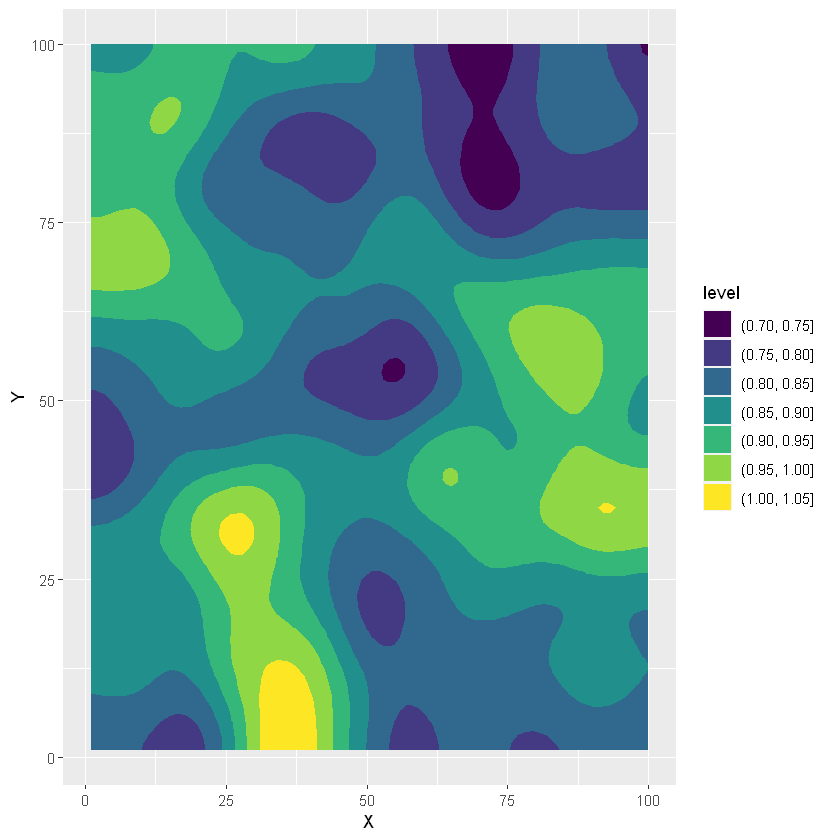

In [98]:
ggplot(new_environment,aes(X,Y,z=Z))+geom_contour_filled()

In [101]:
x <- c()
y <- c()
z <- c()
for(i in 1:100){
    x <- c(x,rep(i,100))
    for(j in 1:100){
        y <- c(y,j)
        z <- c(z,sample(0:5,1))
    }
}
               
environment = data.frame(x,y,z)
colnames(environment) <- c('X','Y','Z')
environment %>% group_by(X,Y)
n <- length(unique(environment$X))
base <- as.matrix(environment$Z)
dim(base) <- c(n,n)
base <- t(base)
one1 <- pollution_average(base)
for(i in 1:99) one1 <- pollution_average(one1)
Z1 <- c()
for(i in 1:100) Z1 <- c(Z1,one1[i,])
new_environment <- data.frame(x,y,Z1)
colnames(new_environment) <- c('X','Y','Z')

X,Y,Z
<int>,<int>,<int>
1,1,1
1,2,2
1,3,5
1,4,0
1,5,1
1,6,4
1,7,1
1,8,5
1,9,5


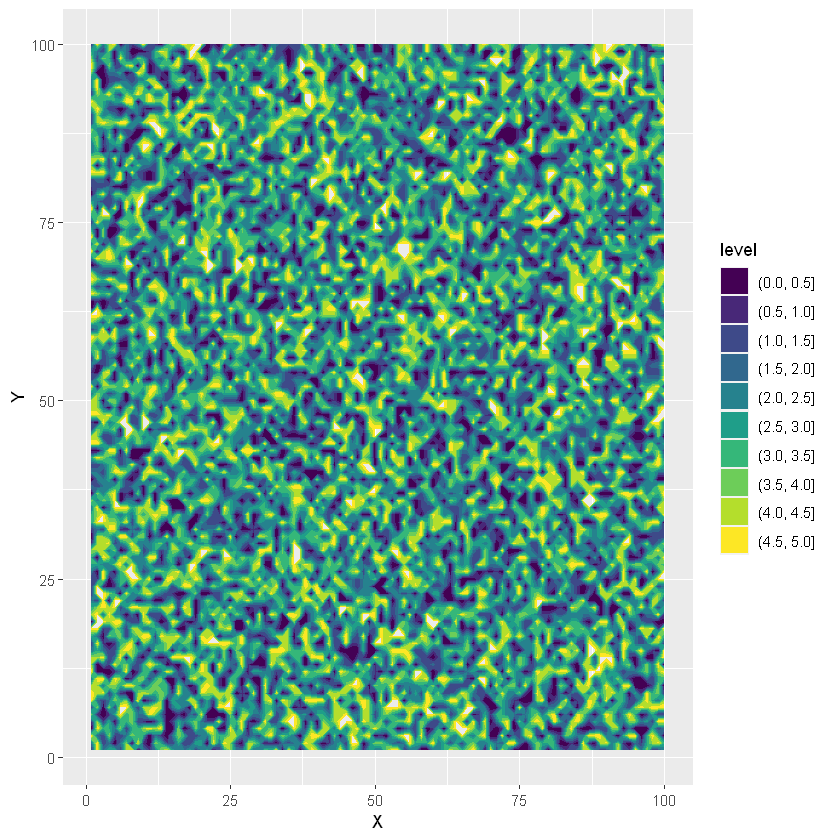

In [102]:
ggplot(environment,aes(X,Y,z=Z))+geom_contour_filled()

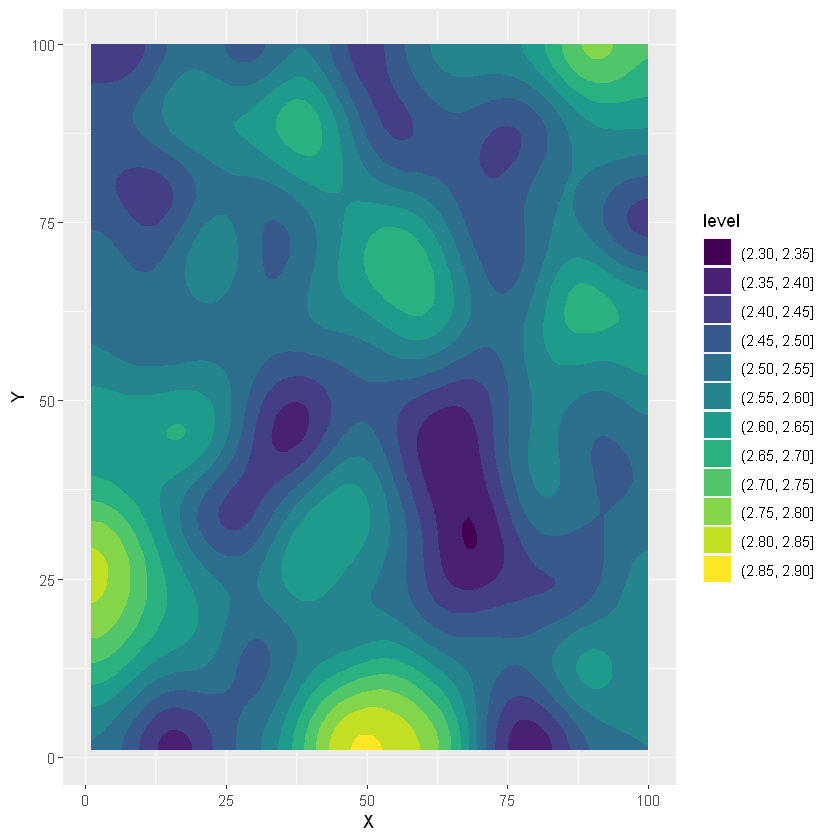

In [103]:
ggplot(new_environment,aes(X,Y,z=Z))+geom_contour_filled()

# To było testowe i można skipnąć, bo nie chcę jeszcze wyrzucać

In [107]:
factory <- matrix(0,nrow=100,ncol=100)
factory[40:60,40:60] <- 1

In [110]:
df_factory <- c()
x <- sort(rep(1:100,100))
y <- rep(1:100,100)
for(i in 1:100) df_factory <- c(df_factory,factory[i,])
df_factory <- data.frame(x,y,df_factory)
colnames(df_factory) <- c('X','Y','Z')

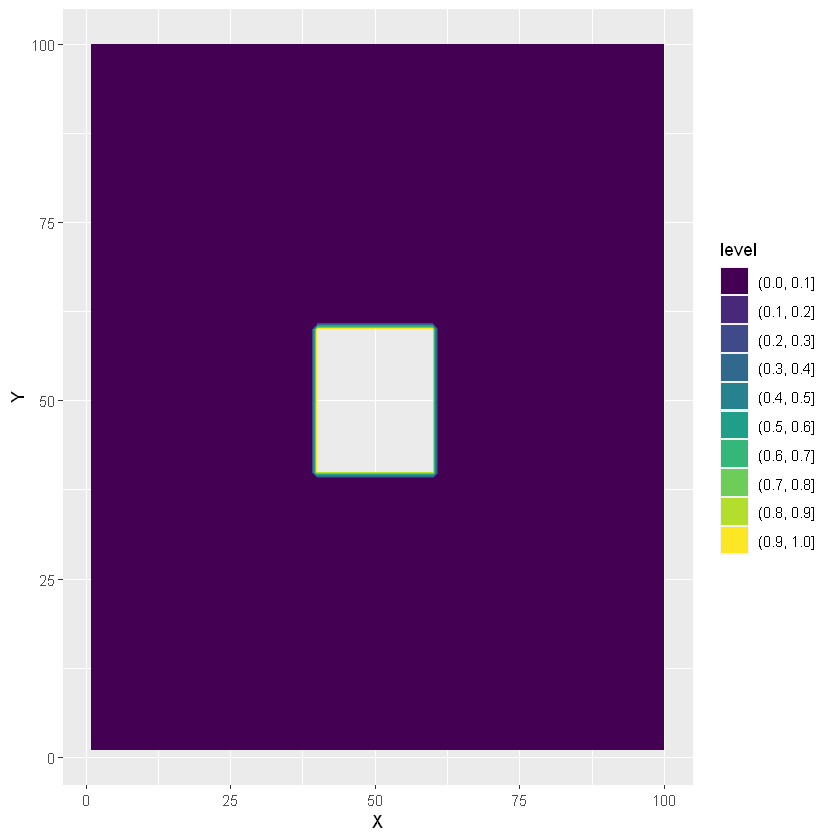

In [111]:
ggplot(df_factory,aes(X,Y,z=Z))+geom_contour_filled()

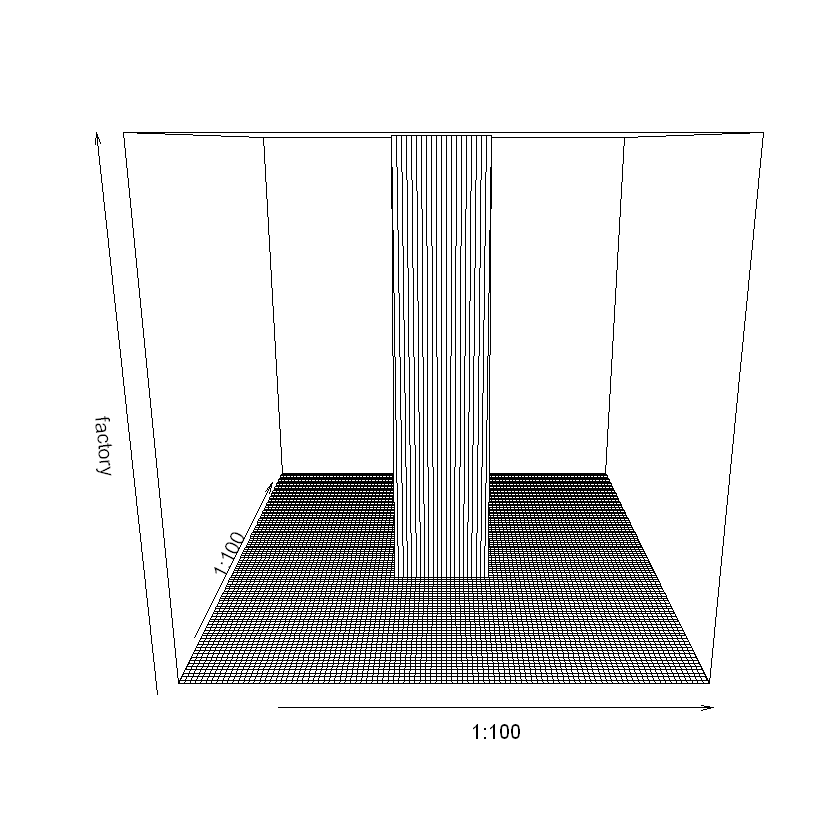

In [119]:
persp(1:100, 1:100, factory)

In [120]:
sample(0:10,1)

[1] 1

# Tu się zaczyna ten model
Jest to Gaussian Plume

Wzięłam to z tego linku:

https://faculty.washington.edu/markbenj/CEE357/CEE%20357%20air%20dispersion%20models.pdf

Dodatkowo w sumie pytanie jak rozwiązać zmienność w czasie bo mamy tylko schemat nowych zanieczyszczeń a nie uwzględniamy starych; rozważyć problem zmienności kierunku wiatru

x,y,z to współrzędne gdzie oś OX jest wyznaczona jako kierunek wiatru
Zrobić wykres tuby z zaznaczonymi wartościami na nim;

Póki co wszędzie przyjęłam $Q=10\frac{g}{s}$ ale to też trzeba będzie przemyśleć.

In [139]:
data_wind <- read.csv('wind_clouds.csv')

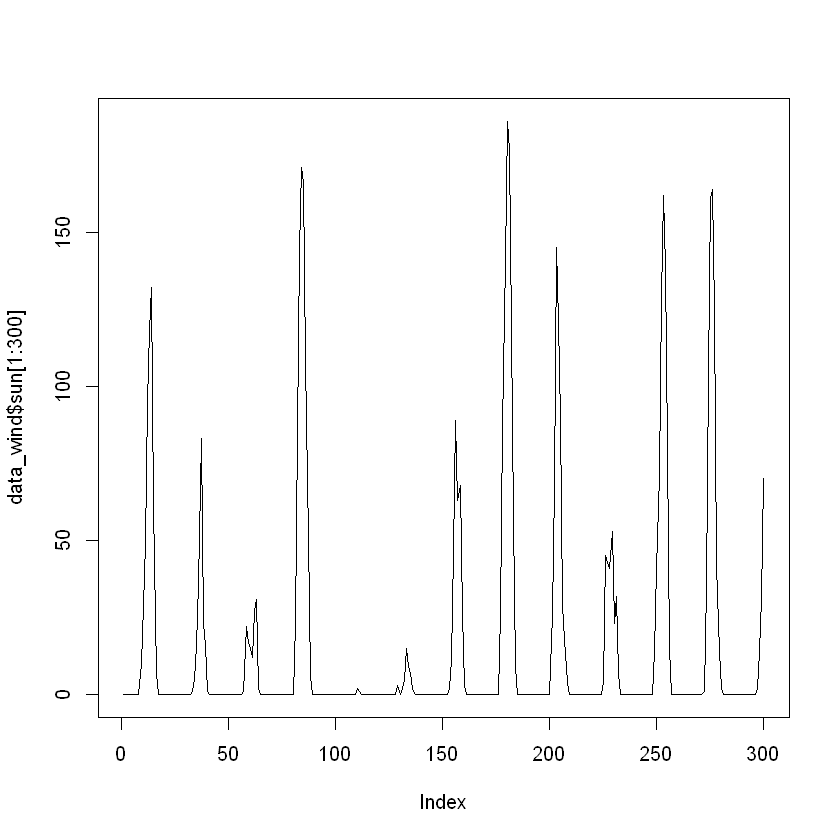

In [156]:
colnames(data_wind) <- c('time','clouds','sun', 'speed', 'direction')
plot(data_wind$sun[1:300],type='l')

In [165]:
find_category <- function(speed, sun, clouds){
    if(speed<2){
        if(sun>=280) t<-'A'
        else if(sun>=120) t<-'B'
        else if(clouds>=50) p<-'E'
        else p<-'F'
    }
    else if(speed<3){
        if(sun>=479) t<-'A'
        else if(sun>=280) t<-'B'
        else if(sun>=120) t<-'C'
        else if(clouds>=50) p<-'E'
        else p<-'F'
    }
    else if(speed<5){
        if(sun>=280) p<-'B'
        else if(sun>=120) p<-'C'
        else if(clouds>=50) p<-'D'
        else p<-'E'
    }
    else if(speed<6){
        if(sun>=280) p<-'C'
        else p<-'D'
    }
    else{
        if(sun>=479) p<-'C'
        else p<-'D'
    }
    return(p)
}

In [166]:
find_p <- function(category){
    if(category=='A'|category=='B') p <- .15
    else if(category=='C') p <- .2
    else if(category=='D') p <- .25
    else p <- .3
    return(p)
}

In [177]:
find_a_b <- function(x,category){
    if(category=='A'){
        if(x<.1) pars <- c(122.800,0.94470)
        else if(x<.15) pars <- c(158.080,1.05420)
        else if(x<.2) pars <- c(170.220,1.09320)
        else if(x<.25) pars <- c(179.520,1.12620)
        else if(x<.3) pars <- c(217.410,1.26440)
        else if(x<.4) pars <- c(258.890,1.40940)
        else if(x<.5) pars <- c(346.750,1.72830)
        else if(x<=3.11) pars <- c(453.850,2.11660)
        else pars <- c(5000,1)
    }
    else if(category=='B'){
        if(x<.2) pars <- c(90.673,0.93198)
        else if(x<.4) pars <- c(98.483,0.98332)
        else pars <- c(109.300,1.09710)
    }
    else if(category=='C') pars <- c(61.141,0.91465)
    else if(category=='D'){
        if(x<.3) pars <- c(34.459,0.86974)
        else if(x<1) pars <- c(32.093,0.81066)
        else if(x<3) pars <- c(32.093,0.64403)
        else if(x<10) pars <- c(33.504,0.60486)
        else if(x<30) pars <- c(36.650,0.56589)
        else pars <- c(44.053,0.51179)
    }
    else if(category=='E'){
        if(x<.1) pars <- c(24.260,0.83660)
        else if(x<.3) pars <- c(23.331,0.81956)
        else if(x<1) pars <- c(21.628,0.75660)
        else if(x<2) pars <- c(21.628,0.63077)
        else if(x<4) pars <- c(22.534,0.57154)
        else if(x<10) pars <- c(24.703,0.50527)
        else if(x<20) pars <- c(26.970,0.46713)
        else if(x<40) pars <- c(35.420,0.37615)
        else pars <- c(47.618,0.29592)
    }
    else{
        if(x<.2) pars <- c(15.209,0.81558)
        else if(x<.7) pars <- c(14.457,0.78407)
        else if(x<1) pars <- c(13.953,0.68465)
        else if(x<2) pars <- c(13.953,0.63227)
        else if(x<3) pars <- c(14.823,0.54503)
        else if(x<7) pars <- c(16.187,0.46490)
        else if(x<15) pars <- c(17.836,0.41507)
        else if(x<30) pars <- c(22.651,0.32681)
        else if(x<60) pars <- c(27.074,0.27436)
        else pars <- c(34.219,0.21716)
    }
    return(pars)
}

In [178]:
find_theta <- function(x,category){
    if(category=='A') pars <- c(24.1670,2.5334)
    else if(category=='B') pars <- c(18.3330,1.8096)
    else if(category=='C') pars <- c(12.5000,1.0857)
    else if(category=='D') pars <- c(8.3330,0.72382)
    else if(category=='E') pars <- c(6.2500,0.54287)
    else pars <- c(4.1667,0.36191)
    theta <- .017453293*(pars[1]-pars[2]*log(x))
    return(theta)
}

In [179]:
get_concentration <- function(Q,u,h,dy,dz,y,z){
    result = Q/(2*pi*u*dy*dz)*(exp(-(z-h)^2/(2*dz^2))+exp(-(z-h)^2/(2*dz^2)))*exp(-y^2/(2*dy^2))
    return(result)
}

In [239]:
gaussian_plume <- function(base, h=10, x_vec=seq(.1,10,.01), Q=10){
    y <- 0
    z <- 0
    row <- base[300,]
    category <- find_category(row$speed,row$sun,row$clouds)
    p <- find_p(category)
    cs <- c()
    for(x in x_vec){
        a_b <- find_a_b(x,category)
        theta <- find_theta(x,category)
        u <- row$speed*(h/10)^p
        dz <- a_b[1]*x^a_b[2]
        if(dz>5000) dz=5000
        dy <- 465.11628*x*tan(theta)
        c1 <- get_concentration(Q,u,h,dy,dz,y,z)
        cs <- c(cs,c1)
    }
    return(cs)
}

Porównujemy koncentrację zanieczyszczeń na różnych wysokościach źródła emisji (tam się jeszcze dodaje to $\Delta h$ ale jeszcze nwm co to jest XD) w zależności od odległości od żródła w kierunku wiatru.

In [207]:
cs_50 <- gaussian_plume(data_wind,h=50)
cs_75 <- gaussian_plume(data_wind,h=75)
cs_100 <- gaussian_plume(data_wind,h=100)
cs_200 <- gaussian_plume(data_wind,h=200)

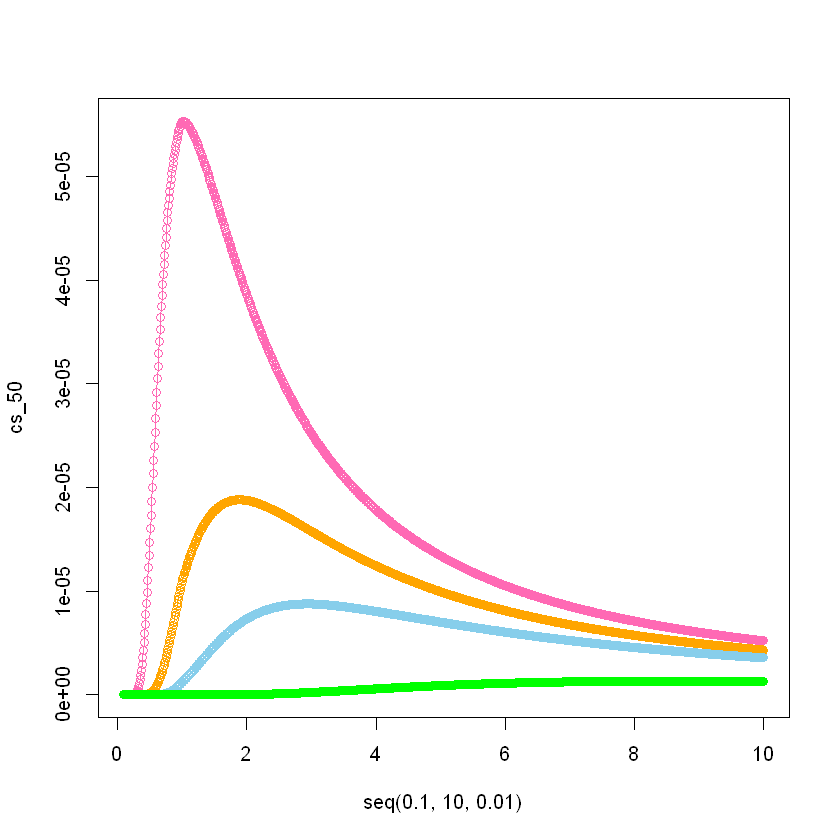

In [208]:
plot(seq(.1,10,.01),cs_50,type='o',col='hotpink')
lines(seq(.1,10,.01),cs_75,type='o', col='orange')
lines(seq(.1,10,.01),cs_100,type='o',col='skyblue')
lines(seq(.1,10,.01),cs_200,type='o',col='green')

In [236]:
h <- c()
cond <- c()
for(i in 50:200){
    h <- c(h,rep(i,991))
    cond <- c(cond,gaussian_plume(data_wind,h=i))
}

In [237]:
h_x_surface <- data.frame(rep(seq(.1,10,.01),151),h,cond)
colnames(h_x_surface) <- c('x','h','cs')

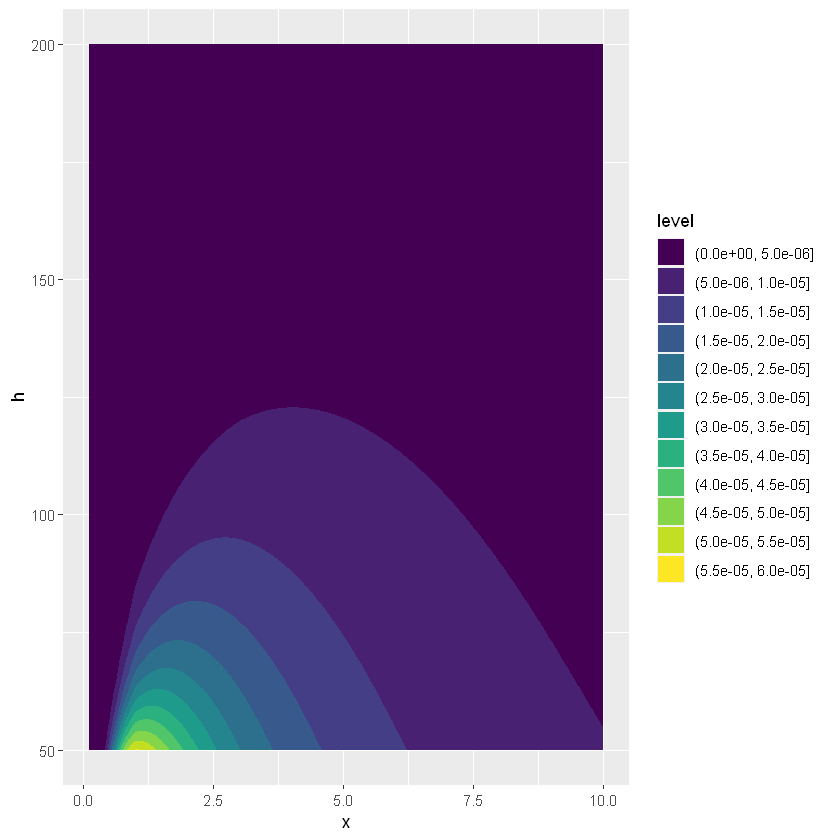

In [238]:
ggplot(h_x_surface, aes(x,h,z=cs))+geom_contour_filled()

In [232]:
length(seq(.1,5,.01))

[1] 491

# Spróbujmy y i z

# z

In [244]:
gaussian_plume2 <- function(base, h=10, x_vec=seq(.1,10,.01), Q=10, z=0){
    y <- 0
    row <- base[300,]
    category <- find_category(row$speed,row$sun,row$clouds)
    p <- find_p(category)
    cs <- c()
    for(x in x_vec){
        a_b <- find_a_b(x,category)
        theta <- find_theta(x,category)
        u <- row$speed*(h/10)^p
        dz <- a_b[1]*x^a_b[2]
        if(dz>5000) dz=5000
        dy <- 465.11628*x*tan(theta)
        c1 <- get_concentration(Q,u,h,dy,dz,y,z)
        cs <- c(cs,c1)
    }
    return(cs)
}

In [245]:
cs_50 <- gaussian_plume(data_wind,h=50)
cs_50_z_10 <- gaussian_plume2(data_wind,h=50,z=10)
cs_50_z_100 <- gaussian_plume2(data_wind,h=50,z=100)

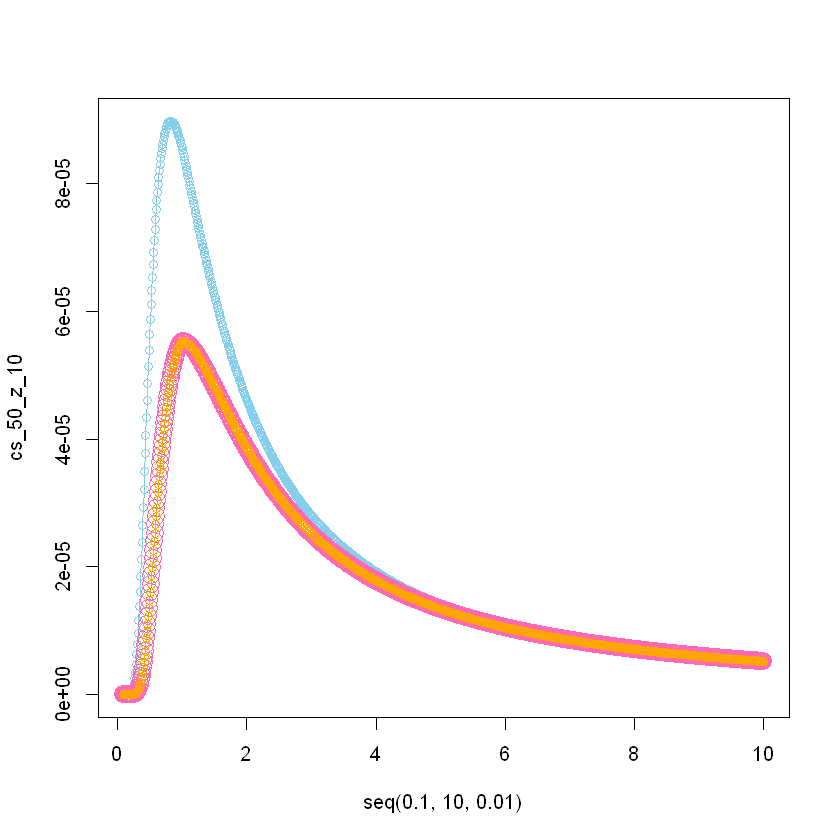

In [255]:
plot(seq(.1,10,.01),cs_50_z_10,type='o', col='skyblue')
lines(seq(.1,10,.01),cs_50_z_100,type='o',col='hotpink',cex=2)
lines(seq(.1,10,.01),cs_50,type='o', col='orange')

In [286]:
z <- c()
cond <- c()
for(i in seq(0.01,30,.01)){
    z <- c(z,rep(i,length(seq(0.01,0.05,0.01))))
    cond <- c(cond,gaussian_plume2(data_wind,h=10,z=i, x_vec=seq(0.01,0.05,0.01)))
}

In [287]:
z_x_surface <- data.frame(rep(seq(0.01,0.05,0.01),length(seq(0.01,30,0.01))),z,cond)
colnames(z_x_surface) <- c('x','z','cs')

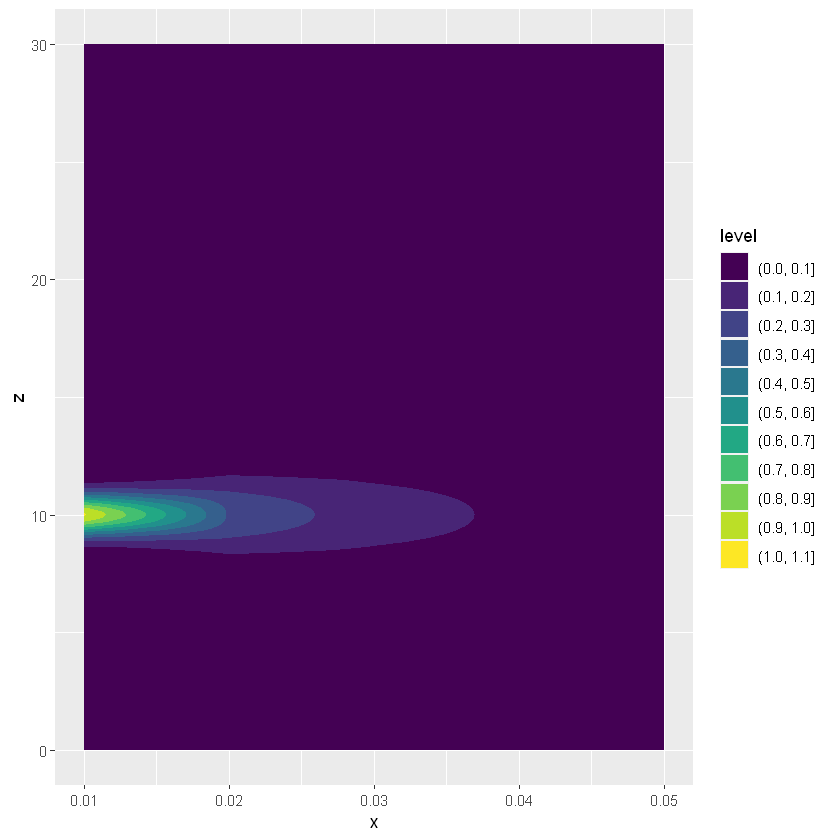

In [288]:
ggplot(z_x_surface, aes(x,z,z=cs))+geom_contour_filled()

In [289]:
z <- c()
cond <- c()
for(i in seq(8,12,.01)){
    z <- c(z,rep(i,length(seq(0.01,0.05,0.01))))
    cond <- c(cond,gaussian_plume2(data_wind,h=10,z=i, x_vec=seq(0.01,0.05,0.01)))
}

In [290]:
z_x_surface <- data.frame(rep(seq(0.01,0.05,0.01),length(seq(8,12,0.01))),z,cond)
colnames(z_x_surface) <- c('x','z','cs')

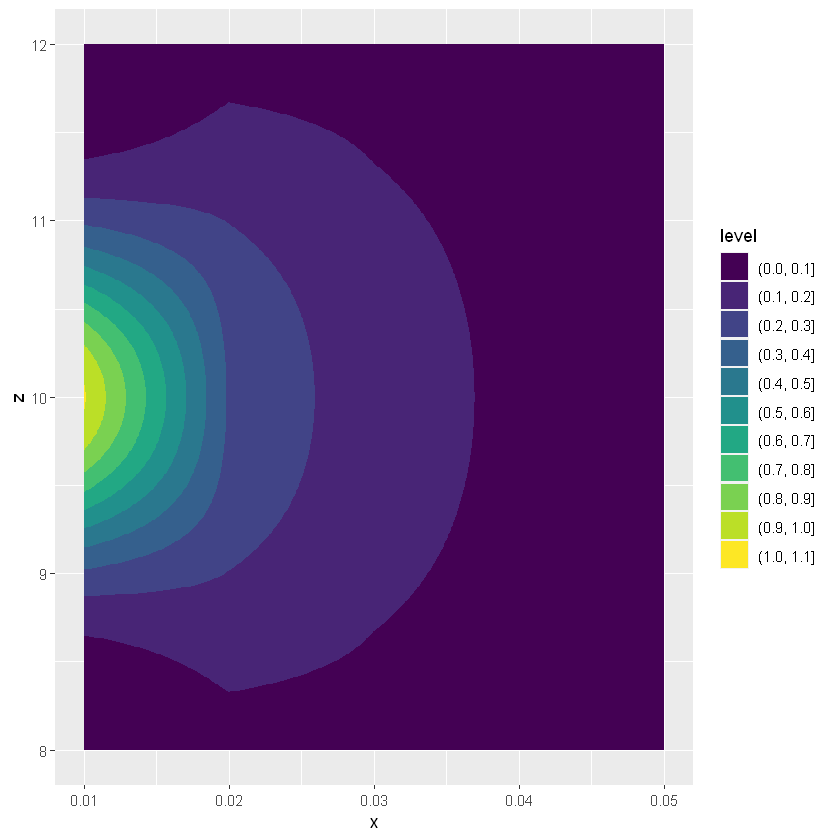

In [291]:
ggplot(z_x_surface, aes(x,z,z=cs))+geom_contour_filled()

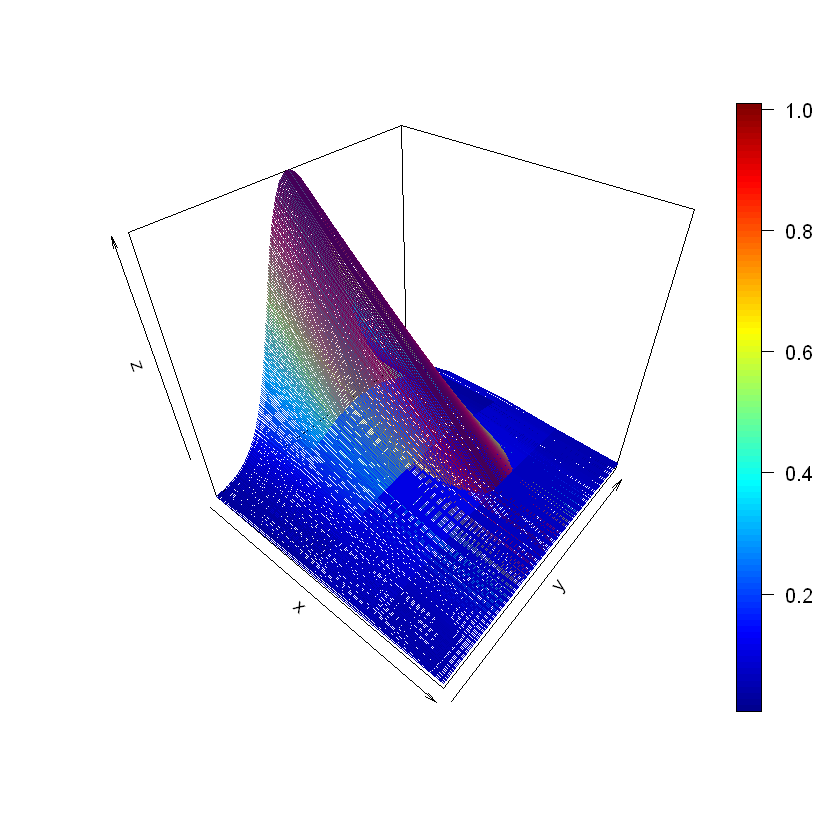

In [294]:
lines3D(z_x_surface$x, z_x_surface$z, z_x_surface$cs)

# y

In [295]:
gaussian_plume3 <- function(base, h=10, x_vec=seq(.1,10,.01), Q=10, y=0, z=0){
    row <- base[300,]
    category <- find_category(row$speed,row$sun,row$clouds)
    p <- find_p(category)
    cs <- c()
    for(x in x_vec){
        a_b <- find_a_b(x,category)
        theta <- find_theta(x,category)
        u <- row$speed*(h/10)^p
        dz <- a_b[1]*x^a_b[2]
        if(dz>5000) dz=5000
        dy <- 465.11628*x*tan(theta)
        c1 <- get_concentration(Q,u,h,dy,dz,y,z)
        cs <- c(cs,c1)
    }
    return(cs)
}

In [309]:
y <- c()
cond <- c()
for(i in seq(0,100,.1)){
    y <- c(y,rep(i,length(seq(0.01,1.5,0.01))))
    cond <- c(cond,gaussian_plume3(data_wind,h=10,y=i, x_vec=seq(0.01,1.5,0.01)))
}
y_x_surface <- data.frame(rep(seq(0.01,1.5,0.01),length(seq(0,100,0.1))),y,cond)
colnames(y_x_surface) <- c('x','y','cs')

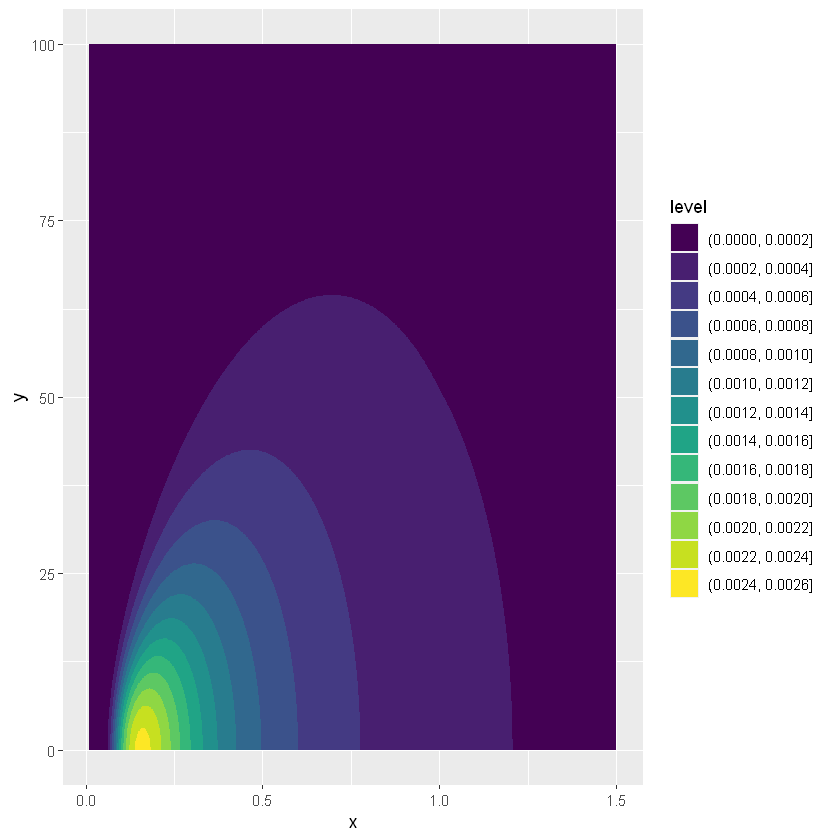

In [310]:
ggplot(y_x_surface, aes(x,y,z=cs))+geom_contour_filled()

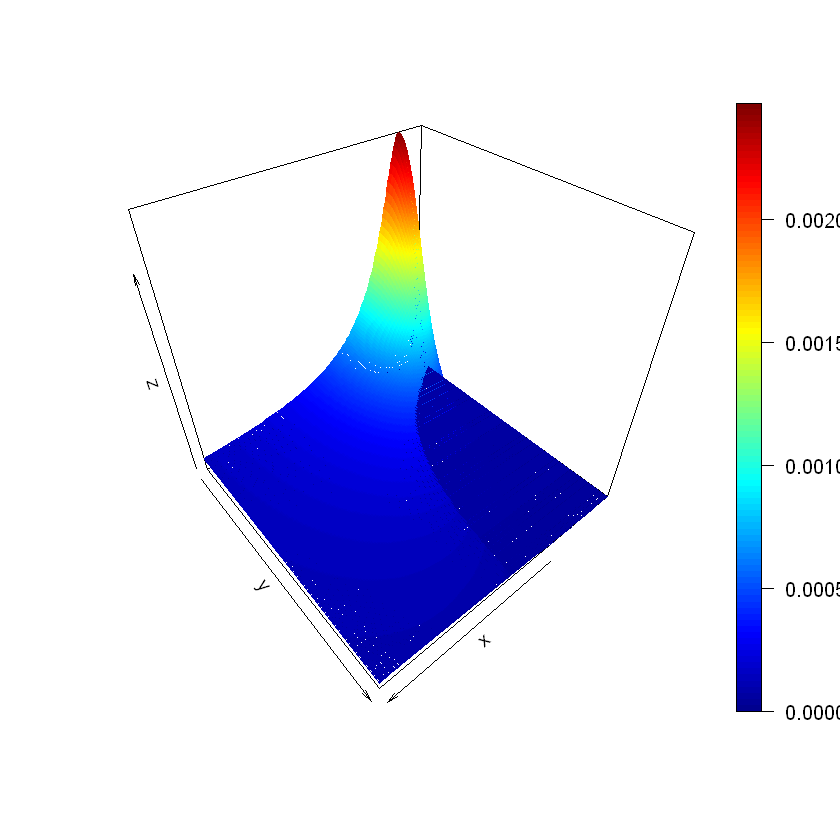

In [315]:
lines3D(y_x_surface$x, y_x_surface$y, y_x_surface$cs,theta=140)

In [337]:
cs_matrix <- matrix(y_x_surface$cs, 
                         nrow = 150, 
                         ncol = 1001)
x_3d <- seq(0.01,1.5,0.01)
y_3d <- seq(0,100,.1)

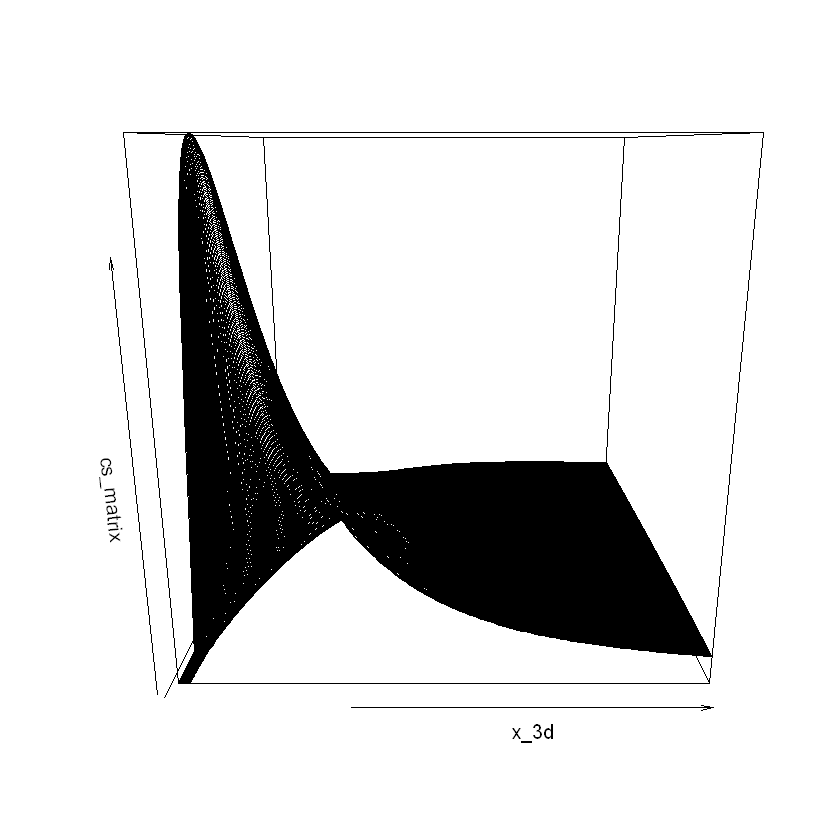

In [338]:
persp(x_3d, y_3d, cs_matrix)